In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Apply vertical flip then horizontal flip to an image.

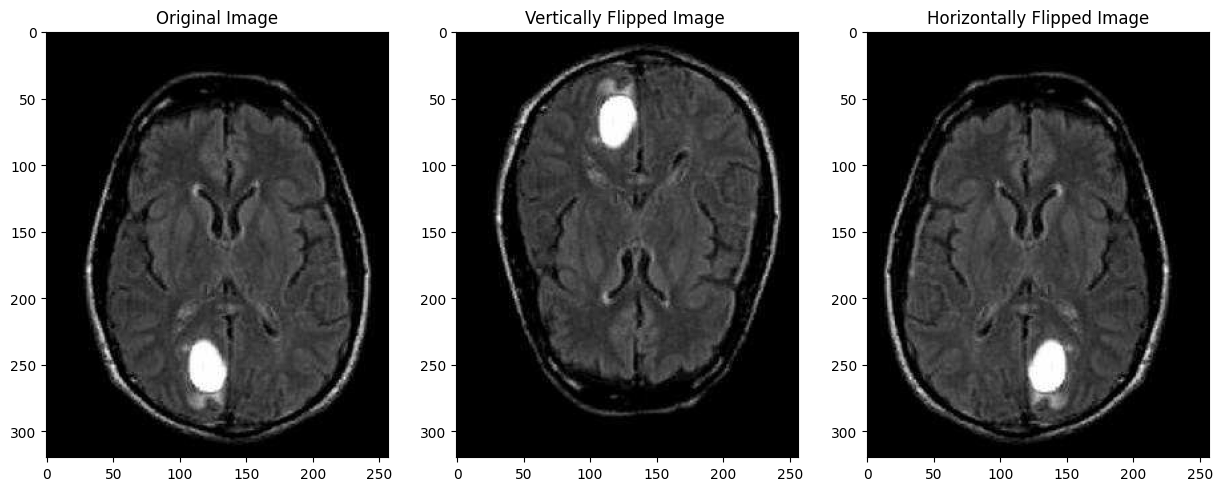

In [58]:
image = cv2.imread('/content/tumor.jpg', cv2.IMREAD_GRAYSCALE)
# Vertical flip
flipped_image_v = cv2.flip(image, 0)
# Horizontal flip
flipped_image_h = cv2.flip(image, 1)


# Display input and output images side by side
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Vertically Flipped Image ')
plt.imshow(flipped_image_v, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Horizontally Flipped Image')
plt.imshow(flipped_image_h, cmap='gray')
plt.show()

Apply rotation on the first output.

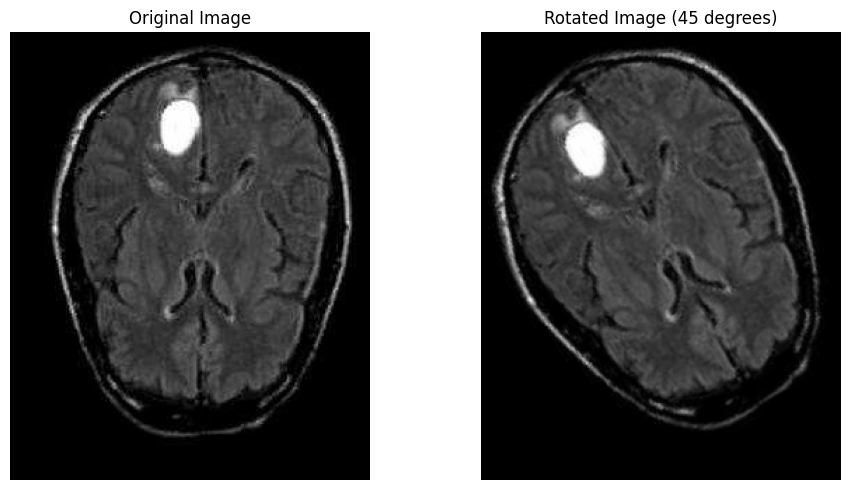

In [60]:
import cv2
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    (h, w) = flipped_image_v.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(flipped_image_v, matrix, (w, h))
    return rotated_image


# Rotate the image by 45 degrees
rotated_img = rotate_image(flipped_image_v, 30)

# Plot the original and rotated images
plt.figure(figsize=(10, 5))  # Adjust figure size

# Original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.imshow(cv2.cvtColor(flipped_image_v, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Rotated image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45 degrees)')
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


Apply 30% zooming on the second output capturing the tumor.

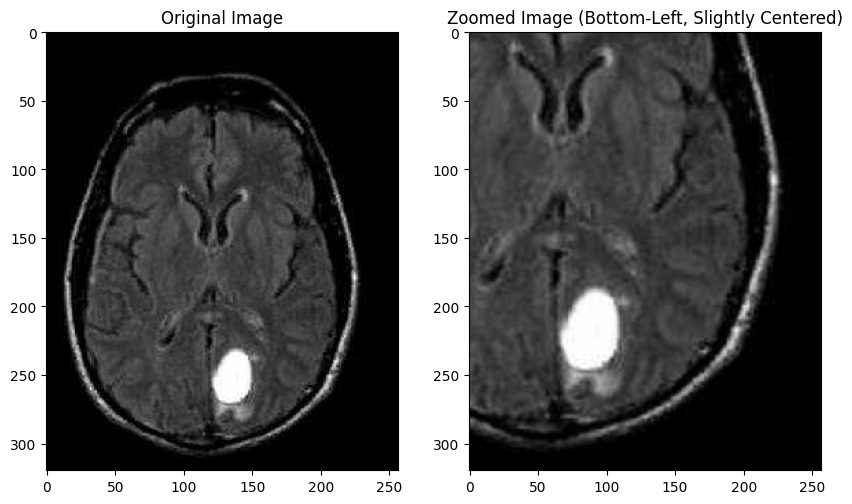

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(flipped_image_h, zoom_factor, region='bottom_left_slightly_centered'):
    height, width = flipped_image_h.shape[:2]

    if region == 'bottom_left_slightly_centered':
        # Define the new region closer to the center of the bottom-left corner
        new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)

        # Adjust the top and left positions to zoom slightly to the center
        top = height - new_height  # Start from the bottom

        # Adjust left position to crop 30% from the right
        left = int(width * 0.3)

    # Crop the image based on the region
    cropped_image = flipped_image_h[top:top+new_height, left:left+new_width]

    # Resize the cropped image back to original size (zoom effect)
    zoomed_image = cv2.resize(cropped_image, (width, height), interpolation=cv2.INTER_LINEAR)

    return zoomed_image


# Zoom into the bottom-left region close to the center
zoomed_image = zoom_image(flipped_image_h, zoom_factor=1.5, region='bottom_left_slightly_centered')

# Display input and output images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(flipped_image_h, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Zoomed Image (Bottom-Left, Slightly Centered)')
plt.imshow(zoomed_image, cmap='gray')
plt.show()
